<a href="https://colab.research.google.com/github/Chrstphr1995/BDA_Project/blob/Version-3/Stock_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2 Die Aktienverläufe

>2.1 Das richtige Setup

>2.2 Generierung der gewünschten Aktienkurse

>2.3 Die Kursverläufe im Überblick

>2.4 Exkurs: Der .csv/.xslx Export für alle Interessierten

>2.5 Microsoft - Eine genaue Betrachtung

>2.6 Der "Simple-Moving-Average"

>2.7 Relative String Index

>2.8 Stock Market Predictions



---



#2.1 Das richtige Setup

Als erstes bereiten wir das Setup für unsere Analyse vor.

Zunächst wird ein Package von Alpha Vantage installiert. Auf [Alpha Vantage](https://www.alphavantage.co/) lässt sich ein individueller API Key generieren. Durch diesen erhalten wir kostenlos Zugang zu historischen Kursdaten in Echzeit.

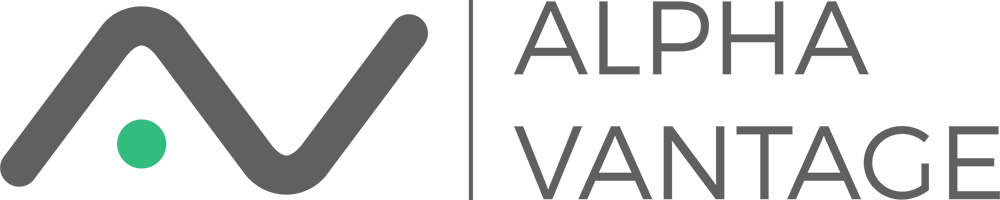


Die Anteilung für den Code stammt von [Youtube](https://www.youtube.com/watch?v=d2kXmWzfS0w). Dieser kann nicht 1:1 übernommen werden, sondern muss an manchen stellen angepasst werden.


In [143]:
pip install alpha_vantage

In [144]:
# Pandas und TimeSeries wird importiert

import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import time


Der generierte API Key von Alpha Vantage wird eingefügt.

In [145]:
# Über die Seite www.alphavantage.co wird ein API-Key generiert. 
# Damit können wir auf die Kursdaten, verschiedener Aktien zugreifen.

api_key = "NMO1Y2U90QAJBJ2V"



---



#2.2 Generierung der gewünschten Aktienkurse

...

In [84]:
# über die API greifen wir auf die Aktie von Microsoft zu
# Dazu geben wir das Aktienkürzel "MSFT" und die Outpuzsize "full" an.
# Mit dem Code ts.get_daily bekommen wir die täglichen Daten
  # Je nach belieben können die daten bspw. mit #ts.get_intraday minutengenau generiert werden.
  
ts = TimeSeries(key=api_key, output_format='pandas')
data_ts, meta_data_ts = ts.get_daily(symbol='MSFT', outputsize='full') 
                                     

In [85]:
# Gleiches Vorgehen wie bei Microsoft, nur mit dem Kürzel "AAPL" für Apple

ta = TimeSeries(key=api_key, output_format='pandas')
data_ta, meta_data_ta = ta.get_daily(symbol='AAPL', outputsize='full') 

In [86]:
# Gleiches Vorgehen wie bei Microsoft, nur mit dem Kürzel "GOOGL" für Google

te = TimeSeries(key=api_key, output_format='pandas')
data_te, meta_data_te = te.get_daily(symbol='GOOGL', outputsize='full')

In [87]:
# Gleiches Vorgehen wie bei Microsoft, nur mit dem Kürzel "FB" für Facebook

tf = TimeSeries(key=api_key, output_format='pandas')
data_tf, meta_data_tf = tf.get_daily(symbol='FB', outputsize='full')



---



In [88]:
# Die generierten Kurse werden gedruckt
# Öffnungspreis, Hoch, Tief, Schlusspreis und Handelsvolumen werden angezeigt
# Aktie: Microsoft

dfMSFT = data_ts
print(dfMSFT)

            1. open   2. high    3. low  4. close   5. volume
date                                                         
2021-01-08   218.68  220.5800  217.0261    219.62  21370938.0
2021-01-07   214.04  219.3400  213.7100    218.29  27694480.0
2021-01-06   212.17  216.4899  211.9400    212.25  35930653.0
2021-01-05   217.26  218.5200  215.7000    217.90  23822953.0
2021-01-04   222.53  223.0000  214.8100    217.69  37130139.0
...             ...       ...       ...       ...         ...
1999-11-05    91.81   92.8700   90.5000     91.56  35083700.0
1999-11-04    92.31   92.7500   90.3100     91.75  27119700.0
1999-11-03    92.94   93.5000   91.5000     92.00  22258500.0
1999-11-02    92.75   94.5000   91.9400     92.56  23174500.0
1999-11-01    93.25   94.1900   92.1200     92.37  26630600.0

[5332 rows x 5 columns]


In [89]:
# Identisches Vorgehen wie bei Microsoft
# Aktie: Apple

dfAAPL = data_ta
print(dfAAPL)

            1. open   2. high   3. low  4. close    5. volume
date                                                         
2021-01-08   132.43  132.6300  130.230    132.05   98494441.0
2021-01-07   128.36  131.6300  127.860    130.92  109578157.0
2021-01-06   127.72  131.0499  126.382    126.60  155087970.0
2021-01-05   128.89  131.7400  128.430    131.01   97664898.0
2021-01-04   133.52  133.6116  126.760    129.41  143301887.0
...             ...       ...      ...       ...          ...
1999-11-05    84.62   88.3700   84.000     88.31    3721500.0
1999-11-04    82.06   85.3700   80.620     83.62    3384700.0
1999-11-03    81.62   83.2500   81.000     81.50    2932700.0
1999-11-02    78.00   81.6900   77.310     80.25    3564600.0
1999-11-01    80.00   80.6900   77.370     77.62    2487300.0

[5332 rows x 5 columns]


In [90]:
# Identisches Vorgehen wie bei Microsoft
# Aktie: Google

dfGOOGL = data_te
print(dfGOOGL)

             1. open    2. high     3. low  4. close   5. volume
date                                                            
2021-01-08  1777.160  1799.3550  1761.2200  1797.830   1669518.0
2021-01-07  1726.760  1777.8200  1726.7600  1774.340   2096829.0
2021-01-06  1700.255  1743.9650  1696.1014  1722.880   2329401.0
2021-01-05  1725.090  1746.8300  1716.9000  1740.050   1017962.0
2021-01-04  1760.000  1762.4899  1707.1400  1726.130   1866195.0
...              ...        ...        ...       ...         ...
2004-08-25   104.760   108.0000   103.8800   106.000   9188600.0
2004-08-24   111.240   111.6000   103.5700   104.870  15247300.0
2004-08-23   110.760   113.4800   109.0500   109.400  18256100.0
2004-08-20   101.010   109.0800   100.5000   108.310  22834300.0
2004-08-19   100.010   104.0600    95.9600   100.335  44659000.0

[4127 rows x 5 columns]


In [91]:
# Identisches Vorgehen wie bei Microsoft
# Aktie: Facebook

dfFB = data_tf
print(dfFB)

            1. open  2. high    3. low  4. close    5. volume
date                                                         
2021-01-08   268.31   268.95  263.1800  267.5700   17765572.0
2021-01-07   265.90   271.61  264.7800  268.7400   15789756.0
2021-01-06   262.00   267.75  260.0100  263.3100   24354149.0
2021-01-05   268.29   272.40  268.2111  270.9700    9871557.0
2021-01-04   274.78   275.00  265.2000  268.9400   15106113.0
...             ...      ...       ...       ...          ...
2012-05-24    32.95    33.21   31.7700   33.0300   50237200.0
2012-05-23    31.37    32.50   31.3600   32.0000   73600000.0
2012-05-22    32.61    33.59   30.9400   31.0000  101786600.0
2012-05-21    36.53    36.66   33.0000   34.0300  168192700.0
2012-05-18    42.05    45.00   38.0000   38.2318  573576400.0

[2175 rows x 5 columns]




---



In [92]:
# Für uns ist in dieser Story nur der Schlusskurs von Bedeutung
# Die restlichen Spalten der Tabelle können mit dem Zusatz "[4. close]" entfernt werden
# Aktie: Microsoft

dfMSFT = data_ts['4. close']
print(dfMSFT)

date
2021-01-08    219.62
2021-01-07    218.29
2021-01-06    212.25
2021-01-05    217.90
2021-01-04    217.69
               ...  
1999-11-05     91.56
1999-11-04     91.75
1999-11-03     92.00
1999-11-02     92.56
1999-11-01     92.37
Name: 4. close, Length: 5332, dtype: float64


In [93]:
# Nun werden die Daten in eine .csv Datei exportiert

import pandas as pd
df = pd.DataFrame(dfMSFT)
df.to_csv('MSFT_Close.csv')

In [94]:
# Für uns ist in dieser Story nur der Schlusskurs von Bedeutung
# Die restlichen Spalten der Tabelle können mit dem Zusatz "[4. close]" entfernt werden
# Aktie: Apple

dfAAPL = data_ta['4. close']
print(dfAAPL)

date
2021-01-08    132.05
2021-01-07    130.92
2021-01-06    126.60
2021-01-05    131.01
2021-01-04    129.41
               ...  
1999-11-05     88.31
1999-11-04     83.62
1999-11-03     81.50
1999-11-02     80.25
1999-11-01     77.62
Name: 4. close, Length: 5332, dtype: float64


In [95]:
# Nun werden die Daten in eine .csv Datei exportiert

import pandas as pd
df = pd.DataFrame(dfAAPL)
df.to_csv('AAPL_Close.csv')

In [96]:
# Für uns ist in dieser Story nur der Schlusskurs von Bedeutung
# Die restlichen Spalten der Tabelle können mit dem Zusatz "[4. close]" entfernt werden
# Aktie: Alphabet

dfGOOGL = data_te['4. close']
print(dfGOOGL)

date
2021-01-08    1797.830
2021-01-07    1774.340
2021-01-06    1722.880
2021-01-05    1740.050
2021-01-04    1726.130
                ...   
2004-08-25     106.000
2004-08-24     104.870
2004-08-23     109.400
2004-08-20     108.310
2004-08-19     100.335
Name: 4. close, Length: 4127, dtype: float64


In [97]:
# Nun werden die Daten in eine .csv Datei exportiert

import pandas as pd
df = pd.DataFrame(dfGOOGL)
df.to_csv('GOOGL_Close.csv')

In [98]:
# Für uns ist in dieser Story nur der Schlusskurs von Bedeutung
# Die restlichen Spalten der Tabelle können mit dem Zusatz "[4. close]" entfernt werden
# Aktie: Facebook

dfFB = data_tf['4. close']
print(dfFB)

date
2021-01-08    267.5700
2021-01-07    268.7400
2021-01-06    263.3100
2021-01-05    270.9700
2021-01-04    268.9400
                ...   
2012-05-24     33.0300
2012-05-23     32.0000
2012-05-22     31.0000
2012-05-21     34.0300
2012-05-18     38.2318
Name: 4. close, Length: 2175, dtype: float64


In [99]:
# Nun werden die Daten in eine .csv Datei exportiert

import pandas as pd
df = pd.DataFrame(dfFB)
df.to_csv('FB_Close.csv')



---



In [100]:
# Nachdem wir die Daten erhoben und vereinfacht haben, werden die Spalten in einer Tabelle zusammengefasst
# Dafür wird eine neue Funktion "total_df1" erstellt.

total_df1 = pd.concat([dfMSFT, dfAAPL, dfGOOGL, dfFB], axis=1)

In [101]:
# Mit print() bilden wir die neue Tabelle ab

print(total_df1)

            4. close  4. close  4. close  4. close
date                                              
1999-11-01     92.37     77.62       NaN       NaN
1999-11-02     92.56     80.25       NaN       NaN
1999-11-03     92.00     81.50       NaN       NaN
1999-11-04     91.75     83.62       NaN       NaN
1999-11-05     91.56     88.31       NaN       NaN
...              ...       ...       ...       ...
2021-01-04    217.69    129.41   1726.13    268.94
2021-01-05    217.90    131.01   1740.05    270.97
2021-01-06    212.25    126.60   1722.88    263.31
2021-01-07    218.29    130.92   1774.34    268.74
2021-01-08    219.62    132.05   1797.83    267.57

[5332 rows x 4 columns]




---



In [102]:
import pandas as pd
df = pd.DataFrame(total_df1)
df.to_csv('Closing_Prices.csv')

In [103]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go

In [104]:
df = pd.read_csv('/content/Closing_Prices.csv')

In [ ]:
fig = go.Figure([go.Scatter(x=df['date'], y=df['4. close'])])

fig.add_trace(
    go.Scatter(x=df['date'],
               y=df['4. close'],
               name='Apple',
               line=dict(color="#7f7f7f")))

fig.add_trace(
    go.Scatter(x=df['date'],
               y=df['4. close'],
               name='Alphabet',
               line=dict(color="#8c564b")))

fig.add_trace(
    go.Scatter(x=df['date'],
               y=df['4. close'],
               name='Facebook',
               line=dict(color="#17becf")))

fig.update_layout(title='Stock Prices of Microsoft till today')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

#2.3 Die Kursverläufe im Überblick

Das sind die Kursverläufe unserer ausgewählten Aktien im Überblick

Mit **matplotlib.pyplot** werden die obenstehenden Daten in einer Grafik visualisiert. Durch die Zusammenfassung der einzelnen Funktionen df1, df2 und df3 zu total_df werden die Schlusskurse aller drei Aktien abgebildet.

Besonderheit: Sowohl bei Apple, als auch bei Alphabet ist 2014 und im August 2020 ein starker Einbruch zu verzeichnen. Der Aktienkurs an sich ist jedoch nicht eingebrochen. Zu diesen Zeitpunkten wurde ein Aktiensplit durchgeführt. Wer beispielsweise am 31.07.2020 eine Apple Aktie im Wert von 400 Dollar besessen hat, hatte am 01.08.2020 vier Aktien im Wert von je 100 Dollar in seinem Portfolio. Dementsprechend sank der Schlusskurs von 400 Dollar auf 100 Dollar, ohne dass sich für die Aktionäre Einbußen auftaten.

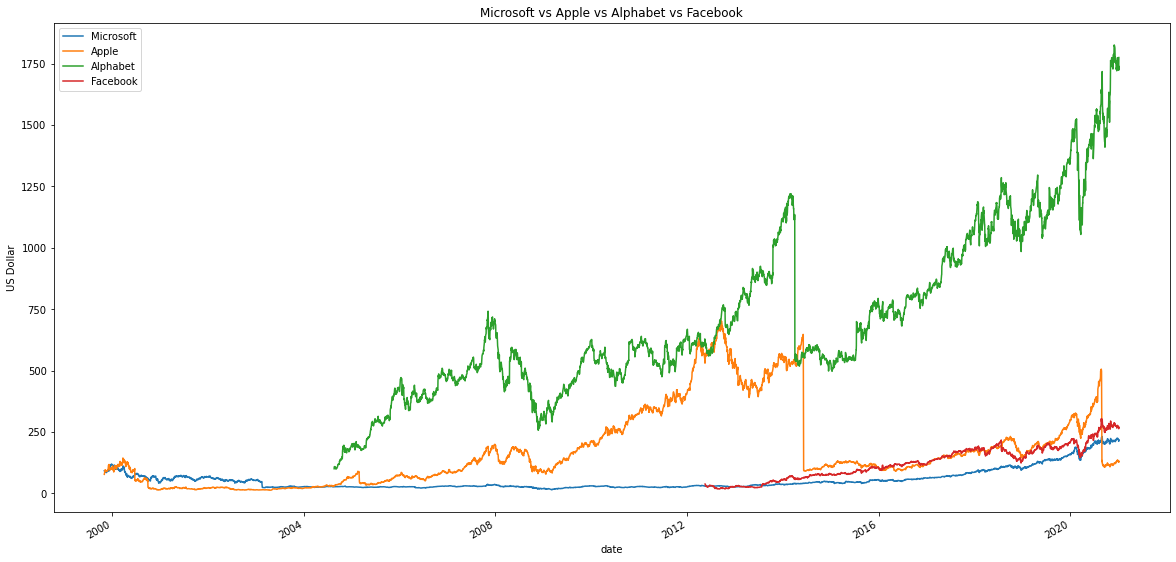

In [28]:
import matplotlib.pyplot as plt
from pylab import rcParams

total_df1.plot()
plt.title("Microsoft vs Apple vs Alphabet vs Facebook")
plt.xlabel("date")
plt.ylabel("US Dollar")
plt.legend(["Microsoft", "Apple", "Alphabet", "Facebook"])
rcParams['figure.figsize'] = 20, 10
plt.show()



---



#2.4 Exkurs: Der .csv/.xslx Export für alle Interessierten

Wer nicht mit Python arbeiten möchte, kann die Daten nun mit Programmen wie Tableau ([free for students](https://www.tableau.com/de-de/academic/students)) oder Microsoft Power BI visualisieren.

[Source for Code](https://www.geeksforgeeks.org/python-save-list-to-csv/)

In [156]:
# Alle Interessierten haben hier die Möglichkeit, sich die Daten in eine .csv Datei zu exportieren
# Damit kann in Programmen wie MS PowerBi oder Tableau weiter experimentiert werden
# Export in Excel ist ebenso möglich

import pandas as pd
df = pd.DataFrame(total_df1)
df.to_csv('Closing_Prices.csv')
df.to_excel('Closing_Prices.xlsx')



---



#2.5 Microsoft - Der Kurs

Da die Kurse von Microsoft, Apple und Alphabet sehr eng miteinander korrelieren (Ausnahme Aktiensplit), wird folgend mit Microsoft als Referenzaktie weitergearbeitet. Dadurch werden die grafischen Darstellungen ebenfalls vereinfacht, weil sich nicht mehr verschiedene Kursdaten innerhalb einer Grafik befinden.

Das Vorgehen für die Generierung der Schlusskurse ist identisch zu *1.1 Generierung und Abbildung der Aktienkurse*

In [106]:
ts = TimeSeries(key=api_key, output_format='pandas')
data_ts, meta_data_ts = ts.get_daily(symbol='MSFT', outputsize='full')

In [107]:
dfMSFT = data_ts['4. close']

Im Vergleich zu *1.1 Generierung und Abbildung der Aktienkurse* wird hier anstelle von total_df = pd.concat([df1, df2, df3], axis=1) nur **total_df = pd.concat([df1], axis=1)** benutzt, da nur eine Aktie betrachtet wird.

In [108]:
total_df = pd.concat([dfMSFT], axis=1)

In [109]:
print(total_df)

            4. close
date                
2021-01-08    219.62
2021-01-07    218.29
2021-01-06    212.25
2021-01-05    217.90
2021-01-04    217.69
...              ...
1999-11-05     91.56
1999-11-04     91.75
1999-11-03     92.00
1999-11-02     92.56
1999-11-01     92.37

[5332 rows x 1 columns]


In [33]:
# import pandas as pd
# df = pd.DataFrame(dfMSFT)
# df.to_csv('/content/MSFT_Close.csv')

In [30]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go
import plotly.express as px

In [31]:
df = pd.read_csv('/content/MSFT_Close.csv')

fig = go.Figure([go.Scatter(x=df['date'], y=df['4. close'])])

fig.update_layout(title='Stock Prices of Microsoft till today')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()



---



#2.6 Microsoft - Der "Simple-Moving-Average"

...

In [166]:
# Hier werden wie unter 1.1 die Packages von Alpha Vantage abgebildet

import pandas as pd
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

In [111]:
# Der API-Key kann aus "1.1 Das richtige Setup" übernommen werden

api_key = "NMO1Y2U90QAJBJ2V"

In [112]:
# Der Code kann aus "2.2 Generierung der gewünschten Aktienkurse" kopiert werden

ts = TimeSeries(key=api_key, output_format='pandas')
data_ts, meta_data_ts = ts.get_daily(symbol='MSFT', outputsize='full')

In [113]:
# Zusätzlich zum Kurs wird nun die Berechnung des Simple Moving Averages (SMA) benötigt
# Durch "ti.get_sma" wird dises vorgenommen

ti = TechIndicators(key=api_key, output_format='pandas')
data_ti, meta_data_ti = ti.get_sma(symbol='MSFT', series_type='close')

In [114]:
# Für die beiden Funktionen ts und ti können in df1 und df2 umgeschrieben werden
# Bei df1 ist (wie oben) wichtig, nur die Spalte "4. close" anzuzeigen
# Unter "total_df" werden beide Funktionen zusammengefasst

df1 = data_ts['4. close']
df2 = data_ti.iloc[1000::]
total_df = pd.concat([df1, df2], axis=1)

In [115]:
# Durch die Zusammenfassung beider Funktionen können Kurse und SMA in einer Tabelle abgebildet werden

print(total_df)

            4. close      SMA
date                         
1999-11-01     92.37      NaN
1999-11-02     92.56      NaN
1999-11-03     92.00      NaN
1999-11-04     91.75      NaN
1999-11-05     91.56      NaN
...              ...      ...
2021-01-04    217.69  218.353
2021-01-05    217.90  218.530
2021-01-06    212.25  218.428
2021-01-07    218.29  218.542
2021-01-08    219.62  218.933

[5332 rows x 2 columns]


In [116]:
import pandas as pd
df = pd.DataFrame(total_df)
df.to_csv('MSFT_CloseSMA.csv')

In [117]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go

In [118]:
df = pd.read_csv('/content/MSFT_CloseSMA.csv')

In [119]:
fig = go.Figure()

In [120]:
# Add Traces
# https://plotly.com/python/custom-buttons/

fig.add_trace(
    go.Scatter(x=df['date'],
               y=df['SMA'],
               name="Simple Moving Average",
               line=dict(color="#33CFA5")))

fig.add_trace(
    go.Scatter(x=df['date'],
               y=df['4. close'],
               name='Schlusskurs',
               line=dict(color="#F06A6A")))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

# Set title
fig.update_layout(
    title_text="Schlusskurs vs. Simple Moving Average",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

- Gibt es zum Zeitpunkt des Leaks Abweichungen vom Durchschnitt?
- Nein gibt es nicht - Anscheinend lohnt sich Finanzbetrug

- Finanzbetrug hat keinerlei Auswirkungen auf die Entwicklung der Aktienkurse
- ANDERERSEITS: Viel plumpere Aktionen haben für einen Einsturz an der Börse gesogt (Elon Musks Tweet über Twitter und Kylie Jenner und Snapchat)

In [ ]:
#import matplotlib.pyplot as plt
#from pylab import rcParams

#total_df.plot()
#plt.title("Closing Price vs Simple Moving Average at Microsoft")
#plt.xlabel("date")
#plt.ylabel("US Dollar")
#plt.legend(["Schlusskurs", "Simple Moving Average"])
#rcParams['figure.figsize'] = 10, 20
#plt.show()



---



#2.7 Microsoft - Der "Relative String Index"

https://www.youtube.com/watch?v=cY9o3yCG9Mo

RSI genauer erklären und die Formel herzeigen.

Der RSI (deutsch: relativer Stärke Index) zeigt Ihnen, ob eine Aktie in einem festgelegten Beobachtungszeitraum überkauft oder überverkauft ist.

Es handelt sich dabei um einen Preisfolgeindikator, dessen Wert stets zwischen 

*   Es handelt sich dabei um einen Preisfolgeindikator, dessen Wert stets zwischen 100 und 0 liegt.
*   Für die Ermittlung des RSI werden die Kursschwankungen eines Basiswerts über die Zeit in Relation gesetzt.


*   Liegt der Wert über 70, ist die Aktie höchstwahrscheinlich überkauft. Das bedeutet, dass verhältnismäßig viele Käufe vorliegen, die den Kurs nach oben treiben. Dies macht einen baldigen Einbruch des Kurses wahrscheinlich.
*   Ab einem RSI von 30 wird von einem überverkauften Basiswert gesprochen. Hier ist es dann in den vergangenen Tagen zu überproportional vielen Verkäufen gekommen, die den Aktienkurs schnell absinken lassen.

*   Der RSI kann Ihnen bei Investitionsentscheidungen als wirkungsvolles Warnsignal dienen. In Extremsituationen können die Ergebnisse allerdings verfälscht werden. Ziehen Sie daher für Ihre Trading Aktivitäten auch immer weitere Parameter zur Beurteilung heran.

In [173]:
ti = TechIndicators(key=api_key, output_format='pandas')
data_ti, meta_data_ti = ti.get_rsi(symbol='MSFT', series_type='close')

In [177]:
dfMSFTRSI = data_ti

In [178]:
total_df_MSFT_RSI = pd.concat([dfMSFTRSI], axis=1)

In [179]:
print(total_df_MSFT_RSI)

                RSI
date               
1999-11-30  47.1204
1999-12-01  51.8525
1999-12-02  55.0573
1999-12-03  57.4671
1999-12-06  55.8313
...             ...
2021-01-04  50.7528
2021-01-05  50.9964
2021-01-06  44.7302
2021-01-07  51.4441
2021-01-08  52.7738

[5312 rows x 1 columns]


In [153]:
import pandas as pd
df = pd.DataFrame(total_df3)
df.to_csv('MSFT_RSI.csv')

In [ ]:
fig = go.Figure()

In [154]:
df = pd.read_csv('/content/MSFT_RSI.csv')

fig = go.Figure([go.Scatter(x=df['date'], y=df['RSI'])])

fig.update_layout(title='Relative String Index')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

Im April 2016 wurden die Paper geleakt. In diesem Zeitraum bricht der RSI für Microsoft ein (knapp über 30). Das bedeutet, dass viele Leute in den Tagen davor Ihre Aktien verkauft haben. 
https://www.finanzen100.de/finanznachrichten/wirtschaft/konzerne-im-fadenkreuz-fuenf-gruende-warum-sich-aktienbesitzer-wegen-der-panama-papers-nicht-sorgen-muessen_H1743650401_260038/

Aktie von Microsoft um ca 10 Prozent abgestürzt, nachdem die Paper geleakt wurden



---



# Das gleiche führen wir für Apple, Alphabet und Facebook durch

#Apple

In [ ]:
df = pd.read_csv('/content/AAPL_Close.csv')

fig = go.Figure([go.Scatter(x=df['date'], y=df['4. close'])])

fig.update_layout(title='Stock Prices of Apple till today')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [69]:
ta = TimeSeries(key=api_key, output_format='pandas')
data_ta, meta_data_ta = ta.get_daily(symbol='AAPL', outputsize='full')

In [ ]:
dfAAPL = data_ta
print(dfAAPL)

In [ ]:
dfAAPL = data_ta['4. close']
print(dfAAPL)

In [74]:
ta = TechIndicators(key=api_key, output_format='pandas')
data_ta, meta_data_ta = ta.get_sma(symbol='AAPL', series_type='close')

In [87]:
dfAAPLSMA = data_ta.iloc[1000::]

In [88]:
total_df_AAPL_SMA = pd.concat([dfAAPL, dfAAPLSMA], axis=1)

In [ ]:
print(total_df_AAPL_SMA)

In [90]:
import pandas as pd
df = pd.DataFrame(total_df_AAPL_SMA)
df.to_csv('AAPL_CloseSMA.csv')

In [91]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go

In [ ]:
df = pd.read_csv('/content/AAPL_CloseSMA.csv')
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=df['date'],
               y=df['SMA'],
               name="Simple Moving Average",
               line=dict(color="#33CFA5")))

fig.add_trace(
    go.Scatter(x=df['date'],
               y=df['4. close'],
               name='Schlusskurs',
               line=dict(color="#F06A6A")))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

# Set title
fig.update_layout(
    title_text="Schlusskurs vs. Simple Moving Average",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

In [180]:
ti = TechIndicators(key=api_key, output_format='pandas')
data_ti, meta_data_ti = ti.get_rsi(symbol='AAPL', series_type='close')

In [181]:
dfAAPLRSI = data_ti
total_df_AAPL_RSI = pd.concat([dfAAPLRSI], axis=1)
print(total_df_AAPL_RSI)

                RSI
date               
1999-11-30  71.4740
1999-12-01  74.4361
1999-12-02  77.7735
1999-12-03  79.6593
1999-12-06  80.0301
...             ...
2021-01-04  56.3707
2021-01-05  58.2475
2021-01-06  51.7845
2021-01-07  56.7346
2021-01-08  57.9241

[5312 rows x 1 columns]


In [182]:
import pandas as pd
df = pd.DataFrame(total_df_AAPL_RSI)
df.to_csv('AAPL_RSI.csv')

In [183]:
fig = go.Figure()

df = pd.read_csv('/content/AAPL_RSI.csv')

fig = go.Figure([go.Scatter(x=df['date'], y=df['RSI'])])

fig.update_layout(title='Relative String Index')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

#Alphabet

In [67]:
df = pd.read_csv('/content/GOOGL_Close.csv')

fig = go.Figure([go.Scatter(x=df['date'], y=df['4. close'])])

fig.update_layout(title='Stock Prices of Alphabet till today')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [68]:
te = TimeSeries(key=api_key, output_format='pandas')
data_te, meta_data_te = te.get_daily(symbol='GOOGL', outputsize='full')

dfGOOGL = data_te
print(dfGOOGL)

             1. open    2. high     3. low  4. close   5. volume
date                                                            
2021-01-08  1777.160  1799.3550  1761.2200  1797.830   1669518.0
2021-01-07  1726.760  1777.8200  1726.7600  1774.340   2096829.0
2021-01-06  1700.255  1743.9650  1696.1014  1722.880   2329401.0
2021-01-05  1725.090  1746.8300  1716.9000  1740.050   1017962.0
2021-01-04  1760.000  1762.4899  1707.1400  1726.130   1866195.0
...              ...        ...        ...       ...         ...
2004-08-25   104.760   108.0000   103.8800   106.000   9188600.0
2004-08-24   111.240   111.6000   103.5700   104.870  15247300.0
2004-08-23   110.760   113.4800   109.0500   109.400  18256100.0
2004-08-20   101.010   109.0800   100.5000   108.310  22834300.0
2004-08-19   100.010   104.0600    95.9600   100.335  44659000.0

[4127 rows x 5 columns]


In [69]:
dfGOOGL = data_te['4. close']
print(dfGOOGL)

date
2021-01-08    1797.830
2021-01-07    1774.340
2021-01-06    1722.880
2021-01-05    1740.050
2021-01-04    1726.130
                ...   
2004-08-25     106.000
2004-08-24     104.870
2004-08-23     109.400
2004-08-20     108.310
2004-08-19     100.335
Name: 4. close, Length: 4127, dtype: float64


In [72]:
te = TechIndicators(key=api_key, output_format='pandas')
data_te, meta_data_te = te.get_sma(symbol='GOOGL', series_type='close')

dfGOOGLSMA = data_te
total_df_GOOGL_SMA = pd.concat([dfGOOGL, dfGOOGLSMA], axis=1)

In [73]:
print(total_df_GOOGL_SMA)

            4. close        SMA
date                           
2004-08-19   100.335        NaN
2004-08-20   108.310        NaN
2004-08-23   109.400        NaN
2004-08-24   104.870        NaN
2004-08-25   106.000        NaN
...              ...        ...
2021-01-04  1726.130  1758.6800
2021-01-05  1740.050  1754.4945
2021-01-06  1722.880  1749.7870
2021-01-07  1774.340  1747.9375
2021-01-08  1797.830  1748.9360

[4127 rows x 2 columns]


In [74]:
import pandas as pd
df = pd.DataFrame(total_df_GOOGL_SMA)
df.to_csv('GOOGL_CloseSMA.csv')

In [75]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go

In [76]:
df = pd.read_csv('/content/GOOGL_CloseSMA.csv')
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=df['date'],
               y=df['SMA'],
               name="Simple Moving Average",
               line=dict(color="#33CFA5")))

fig.add_trace(
    go.Scatter(x=df['date'],
               y=df['4. close'],
               name='Schlusskurs',
               line=dict(color="#F06A6A")))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

# Set title
fig.update_layout(
    title_text="Schlusskurs vs. Simple Moving Average",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

In [184]:
ti = TechIndicators(key=api_key, output_format='pandas')
data_ti, meta_data_ti = ti.get_rsi(symbol='GOOGL', series_type='close')

In [185]:
dfGOOGLRSI = data_ti
total_df_GOOGL_RSI = pd.concat([dfGOOGLRSI], axis=1)
print(total_df_GOOGL_RSI)

                RSI
date               
2004-09-17  68.9537
2004-09-20  70.2478
2004-09-21  67.8287
2004-09-22  68.2378
2004-09-23  70.0490
...             ...
2021-01-04  49.2114
2021-01-05  51.1678
2021-01-06  48.7305
2021-01-07  55.4284
2021-01-08  58.0610

[4107 rows x 1 columns]


In [186]:
import pandas as pd
df = pd.DataFrame(total_df_GOOGL_RSI)
df.to_csv('GOOGL_RSI.csv')

In [187]:
fig = go.Figure()

df = pd.read_csv('/content/GOOGL_RSI.csv')

fig = go.Figure([go.Scatter(x=df['date'], y=df['RSI'])])

fig.update_layout(title='Relative String Index')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

#Facebook

In [ ]:
df = pd.read_csv('/content/FB_Close.csv')

fig = go.Figure([go.Scatter(x=df['date'], y=df['4. close'])])

fig.update_layout(title='Stock Prices of Facebook till today')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
tf = TimeSeries(key=api_key, output_format='pandas')
data_tf, meta_data_tf = tf.get_daily(symbol='FB', outputsize='full')

dfFb = data_tf
print(dfFb)

In [ ]:
dfFb = data_tf['4. close']
print(dfFb)

In [103]:
tf = TechIndicators(key=api_key, output_format='pandas')
data_tf, meta_data_tf = tf.get_sma(symbol='FB', series_type='close')

dfFBSMA = data_tf
total_df_FB_SMA = pd.concat([dfFB, dfFBSMA], axis=1)

In [ ]:
print(total_df_FB_SMA)

In [105]:
import pandas as pd
df = pd.DataFrame(total_df_FB_SMA)
df.to_csv('FB_CloseSMA.csv')

In [106]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go

In [ ]:
df = pd.read_csv('/content/FB_CloseSMA.csv')
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=df['date'],
               y=df['SMA'],
               name="Simple Moving Average",
               line=dict(color="#33CFA5")))

fig.add_trace(
    go.Scatter(x=df['date'],
               y=df['4. close'],
               name='Schlusskurs',
               line=dict(color="#F06A6A")))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

# Set title
fig.update_layout(
    title_text="Schlusskurs vs. Simple Moving Average",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

In [ ]:
ti = TimeSeries(key=api_key, output_format='pandas')
data_ti, meta_data_ti = ti.get_rsi(symbol='FB', series_type='close')

In [138]:
dfFBRSI = data_tb

In [139]:
total_df_FB_RSI = pd.concat([dfMSFTRSI], axis=1)
print(total_df_FB_RSI)

                RSI
date               
1999-11-30  47.1204
1999-12-01  51.8525
1999-12-02  55.0573
1999-12-03  57.4671
1999-12-06  55.8313
...             ...
2021-01-04  50.7528
2021-01-05  50.9964
2021-01-06  44.7302
2021-01-07  51.4441
2021-01-08  52.7738

[5312 rows x 1 columns]


In [ ]:
import pandas as pd
df = pd.DataFrame(total_df_FB_RSI)
df.to_csv('FB_RSI.csv')

In [ ]:
fig = go.Figure()

In [ ]:
df = pd.read_csv('/content/FB_RSI.csv')

fig = go.Figure([go.Scatter(x=df['date'], y=df['RSI'])])

fig.update_layout(title='Relative String Index')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [189]:
ti = TechIndicators(key=api_key, output_format='pandas')
data_ti, meta_data_ti = ti.get_rsi(symbol='FB', series_type='close')

In [190]:
dfFBRSI = data_ti
total_df_FB_RSI = pd.concat([dfFBRSI], axis=1)
print(total_df_FB_RSI)

                RSI
date               
2012-06-18  36.9981
2012-06-19  38.2396
2012-06-20  37.7535
2012-06-21  38.3897
2012-06-22  41.5599
...             ...
2021-01-04  46.1343
2021-01-05  47.6722
2021-01-06  42.8168
2021-01-07  46.8557
2021-01-08  46.1169

[2155 rows x 1 columns]


In [191]:
import pandas as pd
df = pd.DataFrame(total_df_FB_RSI)
df.to_csv('FB_RSI.csv')

In [192]:
fig = go.Figure()

df = pd.read_csv('/content/FB_RSI.csv')

fig = go.Figure([go.Scatter(x=df['date'], y=df['RSI'])])

fig.update_layout(title='Relative String Index')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

#2.8 Stock Market Prediction

...

In [45]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import time

In [46]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [47]:
# Auf die Kursdaten von Microsoft wird via Alpha Vantage zugegriffen
ts = TimeSeries(key=api_key, output_format='pandas')
data_ts, meta_data_ts = ts.get_daily(symbol='MSFT', outputsize='full')

In [48]:
print(data_ts)

            1. open   2. high  3. low  4. close   5. volume
date                                                       
2021-01-07   214.04  219.3400  213.71    218.29  27235288.0
2021-01-06   212.17  216.4899  211.94    212.25  35930653.0
2021-01-05   217.26  218.5200  215.70    217.90  23822953.0
2021-01-04   222.53  223.0000  214.81    217.69  37130139.0
2020-12-31   221.70  223.0000  219.68    222.42  20942132.0
...             ...       ...     ...       ...         ...
1999-11-05    91.81   92.8700   90.50     91.56  35083700.0
1999-11-04    92.31   92.7500   90.31     91.75  27119700.0
1999-11-03    92.94   93.5000   91.50     92.00  22258500.0
1999-11-02    92.75   94.5000   91.94     92.56  23174500.0
1999-11-01    93.25   94.1900   92.12     92.37  26630600.0

[5331 rows x 5 columns]


In [49]:
df5 = data_ts['4. close']

In [50]:
print(df5)

date
2021-01-07    218.29
2021-01-06    212.25
2021-01-05    217.90
2021-01-04    217.69
2020-12-31    222.42
               ...  
1999-11-05     91.56
1999-11-04     91.75
1999-11-03     92.00
1999-11-02     92.56
1999-11-01     92.37
Name: 4. close, Length: 5331, dtype: float64


In [88]:
# A variable for predicting 'n' days out into the future
forecast_out = 1

In [89]:
df6[['Prediction']] = data_ts[['4. close']].shift(forecast_out)

In [91]:
total_df4 = pd.concat([df5, df6[['Prediction']]], axis=1)

In [92]:
# Am 05.01.2021 hatten wir eine prediction von 212,25, welche wir am 06.01.2021 erreicht haben
print(total_df4.head())

            4. close  Prediction
date                            
2021-01-07    218.29         NaN
2021-01-06    212.25      218.29
2021-01-05    217.90      212.25
2021-01-04    217.69      217.90
2020-12-31    222.42      217.69


In [93]:
### Create the independent data set (X)
# Convert the dataframe to a numpy array

X = np.array(total_df4.drop(['Prediction'],1))

# Remove the last 'n' rows
X = X[forecast_out:]

In [94]:
print(X)

[[212.25]
 [217.9 ]
 [217.69]
 ...
 [ 92.  ]
 [ 92.56]
 [ 92.37]]


In [95]:
### Create the dependent data set (y)
# Convert the data frame to a numpy array (all of the values including the NaN's)
y = np.array(total_df4['Prediction'])

#Get all of the y values except the last 'n' rows
y=y[forecast_out:]

print(y)

[218.29 212.25 217.9  ...  91.75  92.    92.56]


In [96]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [97]:
# Create and train the Support Vector Machine (Regressor)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [98]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print('svm_confidence: ', svm_confidence)

svm_confidence:  0.9985458404334081


In [99]:
# Create and train the linear regression model
lr = LinearRegression()

# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print('lr_confidence: ', lr_confidence)

lr_confidence:  0.9986052485483609


In [101]:
# Set x_forecast equal to the last 'n' rows of the original data set from '4. close' column
x_forecast = np.array(total_df4.drop(['Prediction'],1))[:forecast_out]

In [102]:
print(x_forecast)

[[218.29]]


In [103]:
# Print the linear regression for the next 'n' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

[218.59999253]


In [104]:
# Print the vector regressor model for the next 'n' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[214.43039375]


# Wirecard

In [51]:
tw = TimeSeries(key=api_key, output_format='pandas')
data_tw, meta_data_tw = tw.get_daily(symbol='WRCDF', outputsize='full') 

In [52]:
dfWRCDF = data_tw
print(dfWRCDF)

            1. open  2. high  3. low  4. close  5. volume
date                                                     
2021-01-07   0.8400   0.9700   0.700     0.775    58687.0
2021-01-06   1.3600   1.4500   1.320     1.440    54381.0
2021-01-05   1.2400   1.4400   1.100     1.150   169456.0
2021-01-04   0.5248   0.6607   0.470     0.625   102751.0
2020-12-31   0.3710   0.4287   0.365     0.365    16982.0
...             ...      ...     ...       ...        ...
2009-06-30   9.6000   9.6000   9.600     9.600        0.0
2009-06-29   9.6000   9.6000   9.600     9.600        0.0
2009-06-26   9.6000   9.6000   9.600     9.600        0.0
2009-06-25   9.6000   9.6000   9.600     9.600        0.0
2009-06-24   9.6000   9.6000   9.600     9.600      400.0

[2896 rows x 5 columns]


In [53]:
dfWRCDF = data_tw['4. close']
print(dfWRCDF)

date
2021-01-07    0.775
2021-01-06    1.440
2021-01-05    1.150
2021-01-04    0.625
2020-12-31    0.365
              ...  
2009-06-30    9.600
2009-06-29    9.600
2009-06-26    9.600
2009-06-25    9.600
2009-06-24    9.600
Name: 4. close, Length: 2896, dtype: float64


In [57]:
import pandas as pd
df = pd.DataFrame(dfWRCDF)
df.to_csv('WRCDF_Close.csv')

In [58]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go
import plotly.express as px

In [59]:
df = pd.read_csv('/content/WRCDF_Close.csv')

fig = go.Figure([go.Scatter(x=df['date'], y=df['4. close'])])

fig.update_layout(title='Stock Prices of Microsoft till today')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [147]:
tw = TechIndicators(key=api_key, output_format='pandas')
data_tw, meta_data_tw = tw.get_sma(symbol='WRCDF', series_type='close')

dfWRCDFSMA = data_tw
total_df_WRCDF_SMA = pd.concat([dfWRCDF, dfWRCDFSMA], axis=1)

In [78]:
print(total_df_WRCDF_SMA)

            4. close     SMA
date                        
2009-06-24     9.600     NaN
2009-06-25     9.600     NaN
2009-06-26     9.600     NaN
2009-06-29     9.600     NaN
2009-06-30     9.600     NaN
...              ...     ...
2020-12-31     0.365  0.5357
2021-01-04     0.625  0.5357
2021-01-05     1.150  0.5610
2021-01-06     1.440  0.6004
2021-01-07     0.775  0.6065

[2896 rows x 2 columns]


In [79]:
import pandas as pd
df = pd.DataFrame(total_df_WRCDF_SMA)
df.to_csv('WRCDF_CloseSMA.csv')

In [ ]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go

In [80]:
df = pd.read_csv('/content/WRCDF_CloseSMA.csv')
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=df['date'],
               y=df['SMA'],
               name="Simple Moving Average",
               line=dict(color="#33CFA5")))

fig.add_trace(
    go.Scatter(x=df['date'],
               y=df['4. close'],
               name='Schlusskurs',
               line=dict(color="#F06A6A")))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

# Set title
fig.update_layout(
    title_text="Schlusskurs vs. Simple Moving Average",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

In [193]:
ti = TechIndicators(key=api_key, output_format='pandas')
data_ti, meta_data_ti = ti.get_rsi(symbol='WRCDF', series_type='close')

In [194]:
dfWRCDFRSI = data_ti
total_df_WRCDF_RSI = pd.concat([dfWRCDFRSI], axis=1)
print(total_df_WRCDF_RSI)

                RSI
date               
2009-07-23   0.0000
2009-07-24   0.0000
2009-07-27   0.0000
2009-07-28   0.0000
2009-07-29   0.0000
...             ...
2021-01-04  46.6352
2021-01-05  64.3358
2021-01-06  70.1020
2021-01-07  50.4235
2021-01-08  46.9112

[2877 rows x 1 columns]


In [195]:
import pandas as pd
df = pd.DataFrame(total_df_WRCDF_RSI)
df.to_csv('WRCDF_RSI.csv')

In [196]:
fig = go.Figure()

df = pd.read_csv('/content/WRCDF_RSI.csv')

fig = go.Figure([go.Scatter(x=df['date'], y=df['RSI'])])

fig.update_layout(title='Relative String Index')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()